In [29]:
import cv2
import numpy as np
import os
from IPython.display import Image
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 120
plt.rcParams["figure.figsize"] = (20,20)

### Creating rectangle mask

In [30]:
def create_rectangle_mask(img):
    '''
    https://stackoverflow.com/questions/25074488/how-to-mask-an-image-using-numpy-opencv
    code below draws a rectangle with upper left point at (0,500),
    lower right point at (right edge, 1750), gives in a color (255,0,0) 
    and fills it in (thickness=-1)
    '''
    height,width = img.shape[0:2]
    rectangle_img = np.zeros((height,width), np.uint8)
    cv2.rectangle(rectangle_img,(0,500),(rectangle_img.shape[1],1750),(255,0,0),-1)
    masked_rectangle = cv2.bitwise_and(img, img, mask=rectangle_img)
    plt.imshow(masked_rectangle)
    return masked_rectangle

### Convert Image to grayscale

In [68]:
def convert_to_grayscale(img):
    '''
    converts image to grayscale
    https://extr3metech.wordpress.com/2012/09/23/convert-photo-to-grayscale-with-python-opencv/
    '''
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Blur image

In [92]:
def blur_image(img):
    '''
    perform gaussianblur on image
    http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
    '''
    #return cv2.GaussianBlur(img,(11,11),0)
    
    '''
    perform average blur on image
    '''
    return  cv2.blur(img,(25,25))

### Filter out Line Markings

In [78]:
def filter_out_line_markings(img):
    '''
    goal is to filter on color to eliminate line markings
    a lot of code taken from here:
    http://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html
    '''
    white_paint = np.uint8([[[249, 255, 254]]])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_white = cv2.cvtColor(white_paint, cv2.COLOR_BGR2HSV)
    print hsv_white
    lower = np.array([0, 0, 0])
    upper = np.array([0, 0, 255])
    mask = cv2.inRange(hsv, lower, upper)
    res = cv2.bitwise_and(img, img, mask = mask)
    plt.imshow(res)
    return res

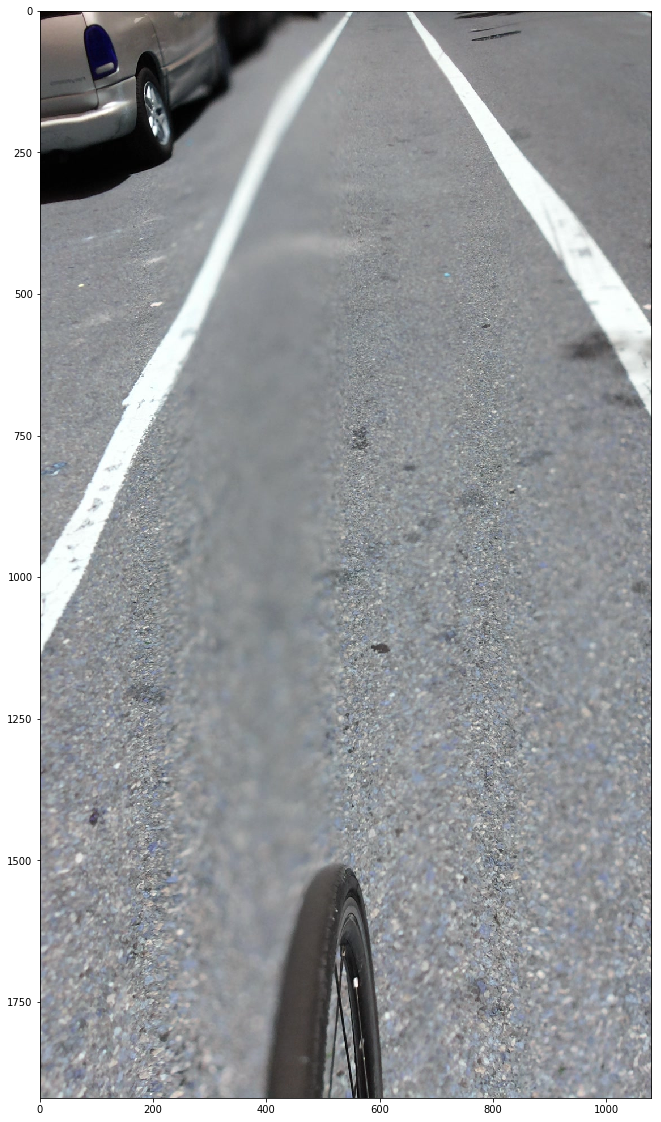

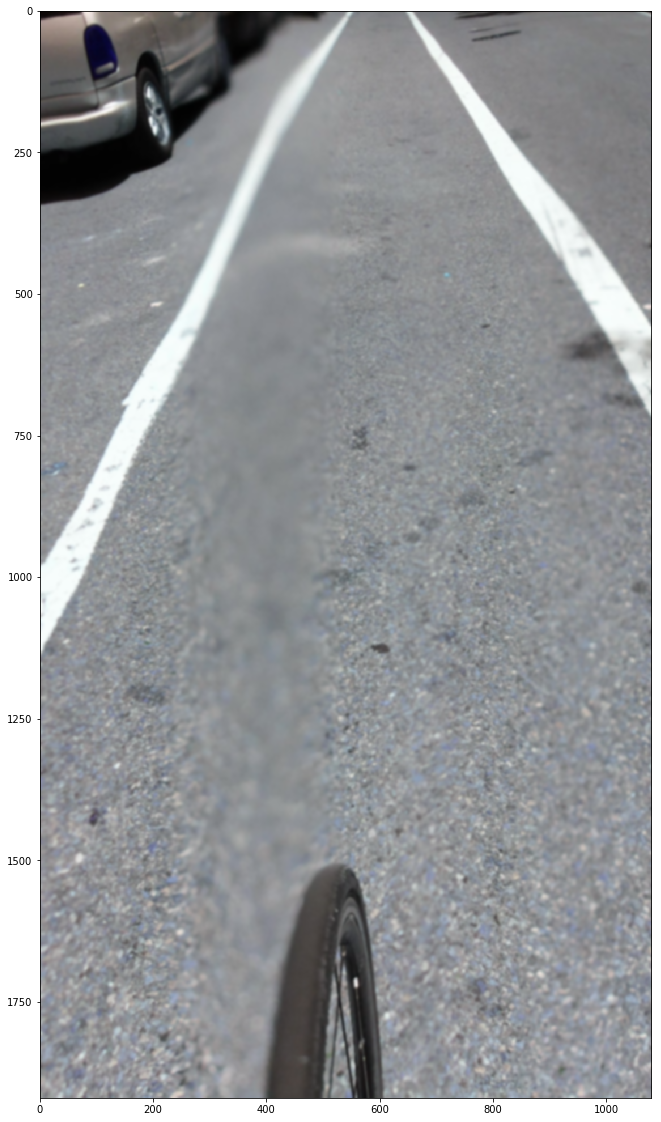

In [81]:
base = cv2.imread('pictures/441358_2ddf1_5932ee7660a12.jpg', 1)
plt.imshow(base)
plt.show()
plt.imshow(blur_image(base))

## Detect Lines / Features

#### Using SIFT to find "important points"

In [31]:
def sift_show_points(img):
    '''
    code taken from here:
    http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html
    '''
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(img,None)

    img_w_key_points=cv2.drawKeypoints(img, kp, None)

    plt.imshow(img_w_key_points)
    plt.show()

#### Using canny to find features / lines

In [86]:
def canny_line_detect(img):
    '''
    code taken from here:
    http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
    '''
    
    for i in range(500, 600, 100):
        edges = cv2.Canny(img,i,i+100)
        plt.subplot(121),plt.imshow(img, cmap = 'gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(edges, cmap = 'gray')
        plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
        plt.show()
        print edges.mean()

### Run thru picture directory and run feature / point detection

pictures/441358_3b530_5932ee37aec56.jpg
original picture


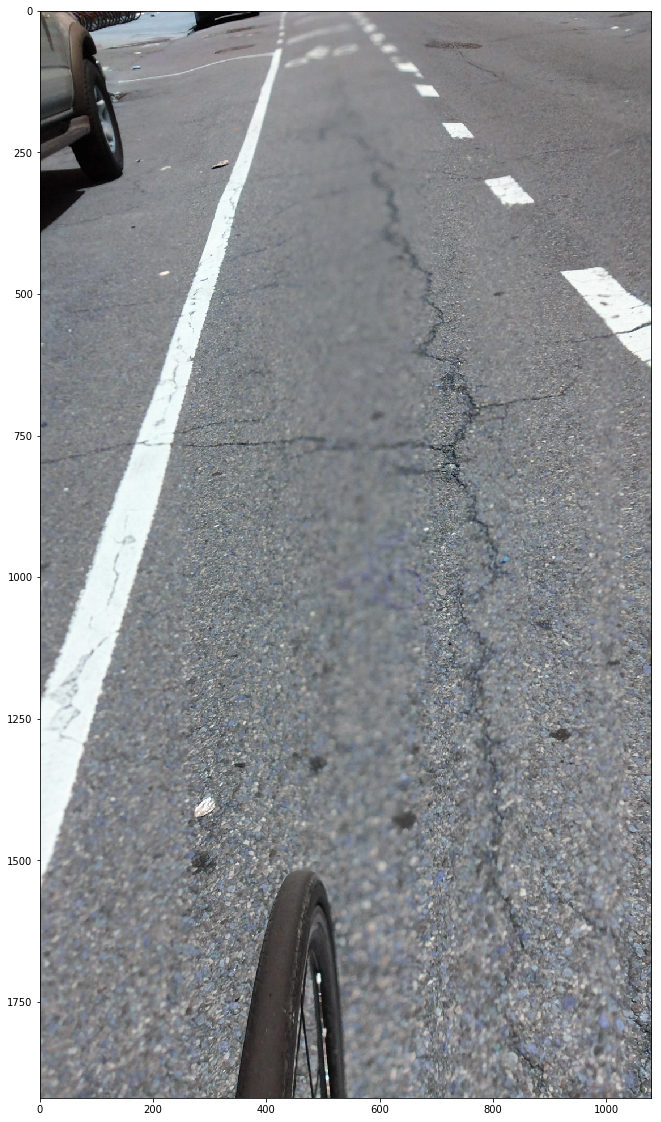

In [ ]:
i=2
directory = 'pictures'
for filename in os.listdir(directory)[15:15+i]:
    if filename.endswith(".jpg"): 
        full_filename = os.path.join(directory, filename)
        print(full_filename)
        #importing base image
        base = cv2.imread(full_filename, 1)
        print("original picture")
        plt.imshow(base)
        plt.show()
        mask = create_rectangle_mask(base)
        mask_blurred = blur_image(mask)
        print("blurred mask")
        plt.imshow(mask_blurred)
        plt.show()
        mask_no_white = filter_out_line_markings(mask_blurred)
        print("canny line detection")
        canny_line_detect(mask_no_white)
        continue
    else:
        continue